# Data analysis of coffee bean sales in Saudi Arabia
Project period 
Starting date : 2025 03 10
Expected closing data 2025 05 06
    
## Overview
Let's assume that a company, Saudi bean, is coffee bean supplier in Saudi Arabia. The sales manager would like to improve inventory management for 2025 and maximize sales and customer satisfaction. 

## Project Plan
### Plan - create report at each week including next steps
1. decide what tools to use - Python,
2. data - need data containing sale amount, location, product.
        found data in kaggle or 
3. time frame
   
|Phase|Periods|Starting date|Ending date|Task|
|-----|----------|-----|--------|-------------------------|
|Plan | 1 week |03 10| 03-17| data, tools, sample size|
|Analyze|  2 weeks| 03 18 | 04 01| Data Cleaning, Descriptive Statistics|
|Construct |2 weeks | 04 02  |04 15| A/B Testing , Model Building |
|Execute  |3 weeks | 04 16 | 05 06| Summary, Presentation, Report |

### Analyze
1. Data Cleaning
2. Descriptive statistics
3. visualization ( Tableu and Python)
==results==: find key insights to develop more
### Construct
1. Hypothesis Test
2. Model building
    Results: make sure find better way to do it, check model accuracy
### Execute
1. presentaion
2. Markdown
3. Output: summary, presentaion, code file with markdown, tableau interactive visualization

As a data Analyst, sampled 730 sales in cities of Saudi Arabia. 



### Data import and initial data cleaning

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data file and assign it to df
path = r"C:\Users\soonn\Documents\GitHub\CoffeeBeanSales\DatasetForCoffeeSales2.csv" # assign file path to 'path'
df = pd.read_csv(path) # load data and assign data frame to df


In [3]:
# initially check 5 rows of data to have an idea of data.
df.head()

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             730 non-null    object
 1   Customer_ID      730 non-null    int64 
 2   City             730 non-null    object
 3   Category         730 non-null    object
 4   Product          730 non-null    object
 5   Unit Price       730 non-null    int64 
 6   Quantity         730 non-null    int64 
 7   Sales Amount     730 non-null    int64 
 8   Used_Discount    730 non-null    bool  
 9   Discount_Amount  730 non-null    int64 
 10  Final Sales      730 non-null    int64 
dtypes: bool(1), int64(6), object(4)
memory usage: 57.9+ KB


In [5]:
df.shape

(730, 11)

In [6]:
df.size

8030

# Insight
- Data type of 'Date' is objects. Changing data type to datetime is better.
- There is no missing values in the data and it has shpe of 730 rows and 11 columns.
- there is 8030 values in the data set.


In [7]:
df.describe(include = 'all')

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
count,730,730.000000,730,730,730,730.000000,730.000000,730.000000,730,730.000000,730.000000
unique,730,NaN,10,1,5,NaN,NaN,NaN,2,NaN,NaN
top,12/30/2024,NaN,Hail,coffee beans,Costa Rica,NaN,NaN,NaN,True,NaN,NaN
freq,1,NaN,87,730,165,NaN,NaN,NaN,371,NaN,NaN
mean,NaN,51.669863,NaN,NaN,NaN,36.794521,26.080822,959.924658,NaN,97.393151,862.531507
std,NaN,29.014339,NaN,NaN,NaN,4.955104,14.480971,551.282730,NaN,123.401350,509.032315
min,NaN,1.000000,NaN,NaN,NaN,30.000000,1.000000,30.000000,NaN,0.000000,24.000000
25%,NaN,27.250000,NaN,NaN,NaN,35.000000,14.000000,495.000000,NaN,0.000000,448.000000
50%,NaN,52.000000,NaN,NaN,NaN,35.000000,27.000000,960.000000,NaN,13.000000,840.000000
75%,NaN,77.000000,NaN,NaN,NaN,40.000000,39.000000,1400.000000,NaN,192.000000,1260.000000


### Insight
- 'City' has 10 unique values, which means 10 cities are sampled and the city 'Hail' counted 87 showing in 730 cities.
- 'Category' contain only one unique value,'coffee_beans'.
- 'Product' has five different names and Costa Rica is the most frequent product in five products.
- 'Unit Price' range is from 30 to 45. the spread is narrow.
- 'Quantity' range is from 1 to 49. this spread is wide compare to unit price.
- Almost half of sales have discounts on sales.
- Sold in discounted price, so final sales price is settled.

In [8]:
# import the second data set
path = r"C:\Users\soonn\Documents\GitHub\CoffeeBeanSales\saudi_cities_geocoding.csv"
df2 = pd.read_csv(path)

In [9]:
# take a look of data structure
df2.head(10)

,City,Latitude,Longitude
0,Riyadh,24.7136,46.6753
1,Jeddah,21.2854,39.2376
2,Mecca,21.3891,39.8579
3,Medina,24.5247,39.5692
4,Dammam,26.3927,49.9777
5,Khobar,26.2172,50.1971
6,Abha,18.2465,42.5117
7,Tabuk,28.3835,36.5662
8,Hail,27.5114,41.7208
9,Buraidah,26.3259,43.9740


### Insight
the dataset contains geographical information of 10 cities in Saudi Arabia. will combine df and df2 into one data set.


In [10]:
# create a new data 'df_combined' by merging df and df2 on the same city name.
df_combined = df.merge(df2, on = 'City')

In [11]:
df_combined.head(10)

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales,Latitude,Longitude
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560,24.7136,46.6753
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595,18.2465,42.5117
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665,28.3835,36.5662
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45,18.2465,42.5117
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472,27.5114,41.7208
5,1/6/2023,1,Khobar,coffee beans,Colombian,40,32,1280,True,256,1024,26.2172,50.1971
6,1/7/2023,95,Buraidah,coffee beans,Brazilian,30,1,30,True,6,24,26.3259,43.9740
7,1/8/2023,27,Medina,coffee beans,Colombian,40,33,1320,False,0,1320,24.5247,39.5692
8,1/9/2023,73,Hail,coffee beans,Guatemala,35,47,1645,False,0,1645,27.5114,41.7208
9,1/10/2023,82,Dammam,coffee beans,Costa Rica,35,4,140,False,0,140,26.3927,49.9777


In [12]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             730 non-null    object 
 1   Customer_ID      730 non-null    int64  
 2   City             730 non-null    object 
 3   Category         730 non-null    object 
 4   Product          730 non-null    object 
 5   Unit Price       730 non-null    int64  
 6   Quantity         730 non-null    int64  
 7   Sales Amount     730 non-null    int64  
 8   Used_Discount    730 non-null    bool   
 9   Discount_Amount  730 non-null    int64  
 10  Final Sales      730 non-null    int64  
 11  Latitude         730 non-null    float64
 12  Longitude        730 non-null    float64
dtypes: bool(1), float64(2), int64(6), object(4)
memory usage: 69.3+ KB


In [13]:
# check data duplication.
df_duplicated = df_combined[df_combined.duplicated()]
df_duplicated

# add month variable
df['Date'] = pd.to_datetime(df['Date']) # change datetime

df['month'] =df['Date'].dt.month

### Insight
- The combined dataset does not have duplication. 

In [14]:
# change data type of 'date'
df_combined['Date'] = pd.to_datetime(df_combined['Date'])
df_combined.info() # check data type changed successfully.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             730 non-null    datetime64[ns]
 1   Customer_ID      730 non-null    int64         
 2   City             730 non-null    object        
 3   Category         730 non-null    object        
 4   Product          730 non-null    object        
 5   Unit Price       730 non-null    int64         
 6   Quantity         730 non-null    int64         
 7   Sales Amount     730 non-null    int64         
 8   Used_Discount    730 non-null    bool          
 9   Discount_Amount  730 non-null    int64         
 10  Final Sales      730 non-null    int64         
 11  Latitude         730 non-null    float64       
 12  Longitude        730 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 69.3+ KB


# Optimizing inventory
## Relevant variables
- Product - categorical variable
- Quantity - continuous variavble
- City - categorical variable
## Reasoning
I would like to build a model with one continuous dependent variable and two categorical independent variables.
Dependent variable : 'Quantity'
Independent variables : 'City', 'Product'
I  will perform Multivariate ANOVA.

## Steps
1. Build hyphothesis
3. fit the model
4. check model assumptions
5. evaluate model

<Axes: xlabel='month', ylabel='Quantity'>

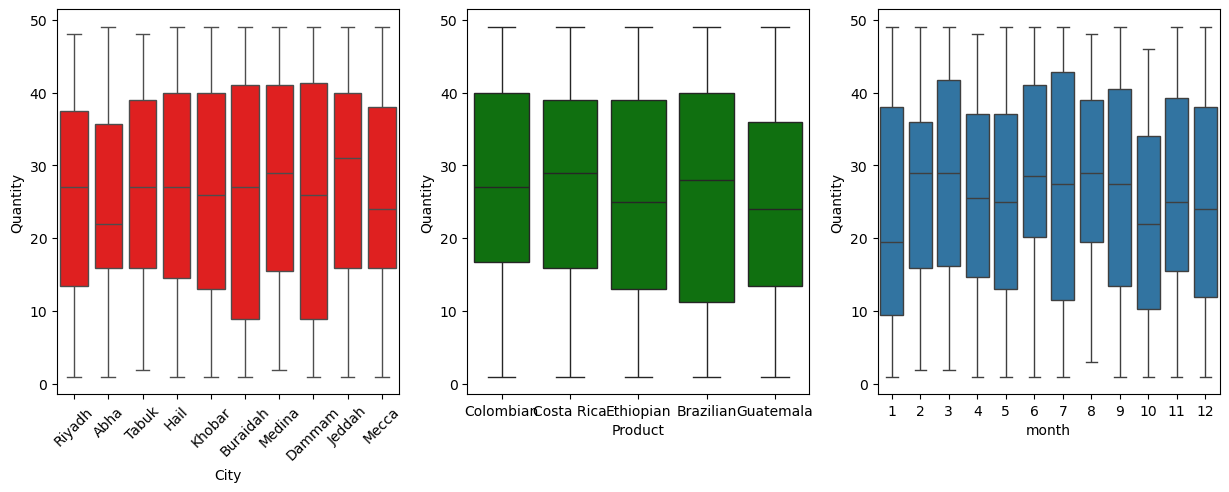

In [15]:
# detect any difference on city-quantiy, product-quantity, product-month
fig, axes = plt.subplots(1,3, figsize = (15,5))
sns.boxplot(data = df, x = 'City', y = 'Quantity' , ax = axes[0], color = 'red')
axes[0].tick_params(axis='x', rotation=45)
sns.boxplot(data = df, x = 'Product', y = 'Quantity',ax = axes[1], color = 'green')

sns.boxplot(data = df, x = 'month', y = 'Quantity', ax = axes[2])


In [16]:
# Build hypothesis
h_null = 'The quantity of coffee bean sales is the same in different city'
h_alt = 'The quantity of coffee bean sleas is different in different city'
print("Null hypothesis : ", h_null)
print('Althernative hypothesis : ', h_alt)

Null hypothesis :  The quantity of coffee bean sales is the same in different city
Althernative hypothesis :  The quantity of coffee bean sleas is different in different city


In [17]:
# build formula and holdout sample
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

ols_formula = "Quantity~ C(City)"
x = df['City']
y = df['Quantity']

OLS = ols(formula = ols_formula, data = df)
model = OLS.fit()
print(model.summary())

from statsmodels.stats.anova import anova_lm

anova_lm(model, typ = 2)

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.3823
Date:                Sat, 22 Mar 2025   Prob (F-statistic):              0.944
Time:                        17:01:30   Log-Likelihood:                -2984.8
No. Observations:                 730   AIC:                             5990.
Df Residuals:                     720   BIC:                             6035.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              24.4091    

,sum_sq,df,F,PR(>F)
C(City),727.007237,9.0,0.382275,0.943814
Residual,152143.224270,720.0,NaN,NaN


All pvalue of categorical variables, city have high and this indicate each coefficient is not statisticaly significant and fail to reject the hypothesis the quantity of each city is the same.

In [18]:
# build hypothesis
h_null = "The sales quantity of coffee bean is the same in product"
h_alt = "The sales quantity of coffee bean is different in product"
print("Null hypothesis : ", h_null)
print('Althernative hypothesis : ', h_alt)

Null hypothesis :  The sales quantity of coffee bean is the same in product
Althernative hypothesis :  The sales quantity of coffee bean is different in product


In [19]:
# build formula and ols
ols_formula = "Quantity ~ C(Product)"
OLS = ols(formula = ols_formula, data = df)
model = OLS.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6105
Date:                Sat, 22 Mar 2025   Prob (F-statistic):              0.655
Time:                        17:01:30   Log-Likelihood:                -2985.3
No. Observations:                 730   AIC:                             5981.
Df Residuals:                     725   BIC:                             6004.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

All pvalue of categorical variables, product have high and this indicate each coefficient is not statisticaly significant and fail to reject the hypothesis the quantity of each product is the same.

<Axes: >

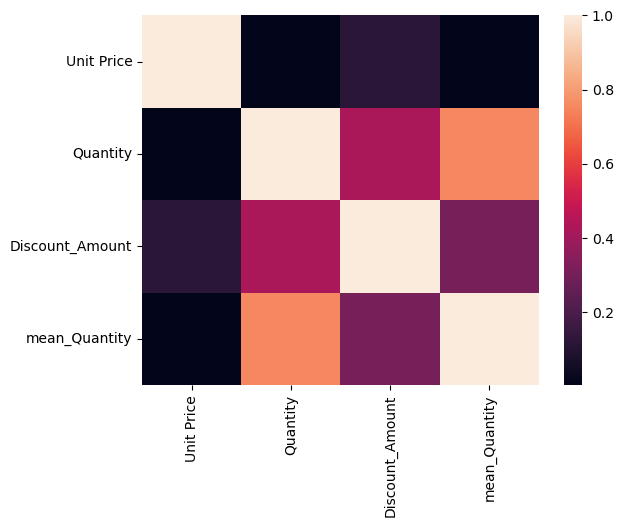

In [20]:
# adding mean of city,month,product
df['city_product_month'] = df['City'].astype(str) + ' ' + df['Product'].astype(str) + ' ' + df['month'].astype(str)
grouped = df.groupby('city_product_month').mean(numeric_only = True)[['Quantity']]
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['Quantity']
df['mean_Quantity'] = df['city_product_month'] 
df['mean_Quantity'] = df['mean_Quantity'].map(grouped_dict)

df_corr = df[['Unit Price', 'Quantity', 'Discount_Amount','mean_Quantity']].corr()
sns.heatmap(df_corr)

### Customer_ID and Sales
1. Check Customer_ID and find big customers
2. check big customers' sales, frequency, order size and  discount amount
3. build strategies for big customers.

    Customer_ID  Final Sales
1             2        14334
96           97        13602
81           82        12932
80           81        11903
49           50        11285
..          ...          ...
11           12         2813
32           33         2548
19           20         1826
86           87         1440
69           70         1050

[100 rows x 2 columns]
       Customer_ID   Final Sales
count   100.000000    100.000000
mean     50.500000   6296.480000
std      29.011492   2586.040359
min       1.000000   1050.000000
25%      25.750000   4403.500000
50%      50.500000   6161.000000
75%      75.250000   7687.250000
max     100.000000  14334.000000


<Axes: xlabel='Final Sales'>

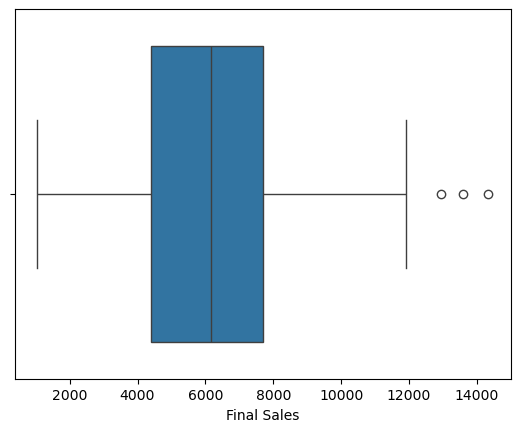

In [21]:
df_sales_ID = df_combined[['Customer_ID', 'Final Sales']].groupby(['Customer_ID']).sum().reset_index()
df_sales_ID = df_sales_ID.sort_values(by = 'Final Sales', ascending = False)
print(df_sales_ID)
print(df_sales_ID.describe())
sns.boxplot(data = df_sales_ID, x = 'Final Sales')

In [22]:
# there are three big customers
# a special promotion on the big three will and make a deal with them will boost the market share.
# find frequency of orders and date will help to prepare stocks to supply faster.
# calculate discounts rate 

In [23]:
big_three = df_sales_ID[df_sales_ID['Final Sales'] >= 12000] # make a data frame for top three
big_three_ID = big_three['Customer_ID'].tolist() # save customer ids of top three sales
big_three_df = df_combined[df_combined['Customer_ID'].isin(big_three_ID)] # build a new data frame with with customer ids

# add year and month to dataset
big_three_df['year'] = big_three_df['Date'].dt.year
big_three_df['month'] = big_three_df['Date'].dt.month_name().str[:3]
# check the columns are added to 
big_three_df.head()


C:\Users\soonn\AppData\Local\Temp\ipykernel_17792\229075286.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_three_df['year'] = big_three_df['Date'].dt.year
C:\Users\soonn\AppData\Local\Temp\ipykernel_17792\229075286.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_three_df['month'] = big_three_df['Date'].dt.month_name().str[:3]


,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales,Latitude,Longitude,year,month
9,2023-01-10,82,Dammam,coffee beans,Costa Rica,35,4,140,False,0,140,26.3927,49.9777,2023,Jan
19,2023-01-20,2,Riyadh,coffee beans,Ethiopian,45,18,810,True,162,648,24.7136,46.6753,2023,Jan
34,2023-02-04,82,Riyadh,coffee beans,Colombian,40,35,1400,False,0,1400,24.7136,46.6753,2023,Feb
41,2023-02-11,2,Dammam,coffee beans,Colombian,40,43,1720,False,0,1720,26.3927,49.9777,2023,Feb
51,2023-02-21,97,Dammam,coffee beans,Guatemala,35,36,1260,True,252,1008,26.3927,49.9777,2023,Feb


## Sales by month
In order to prepare inventory for the sales, want to know the sales of each month and based on this will build predictive model to answer question.
From this process i will achieve 
1. sum of quantity by month for each product with visualization
2. predictive model for 2020 to maintain inventory

In [24]:
df_combined['year'] = df_combined['Date'].dt.year
df_combined['month'] = df_combined['Date'].dt.month_name().str[:3]
products = df_combined['Product'].unique().tolist()
products # check products
print("Product Nama: ", str(products), "\nNumber of Product Type : ",len(products))
df_combined.head()

Product Nama:  ['Colombian', 'Costa Rica', 'Ethiopian', 'Brazilian', 'Guatemala'] 
Number of Product Type :  5


,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales,Latitude,Longitude,year,month
0,2023-01-01,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560,24.7136,46.6753,2023,Jan
1,2023-01-02,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595,18.2465,42.5117,2023,Jan
2,2023-01-03,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665,28.3835,36.5662,2023,Jan
3,2023-01-04,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45,18.2465,42.5117,2023,Jan
4,2023-01-05,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472,27.5114,41.7208,2023,Jan


Text(0.5, 1.0, 'Total Quantity of Product Sold by month in Saudi Arabia from 2023 to 2024')

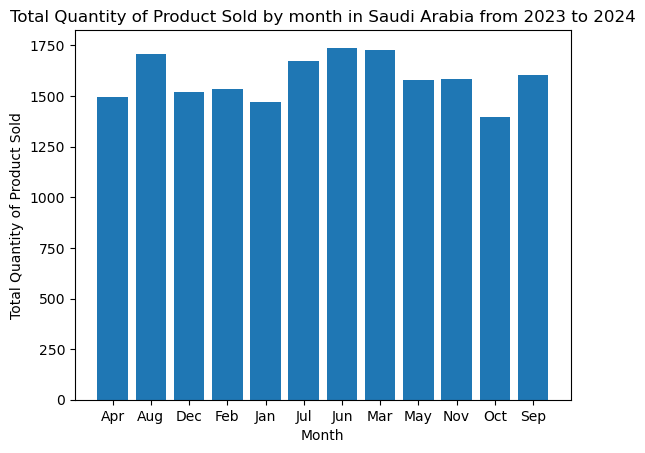

In [25]:
df_month = df_combined[['month','Quantity']].groupby('month').sum().reset_index()
df_month.head()
plt.bar(df_month['month'],df_month['Quantity'])
plt.xlabel('Month')
plt.ylabel('Total Quantity of Product Sold')
plt.title('Total Quantity of Product Sold by month in Saudi Arabia from 2023 to 2024')

Text(0.5, 1.0, 'Average Quantity of Product Sold by month in Saudi Arabia from 2023 to 2024')

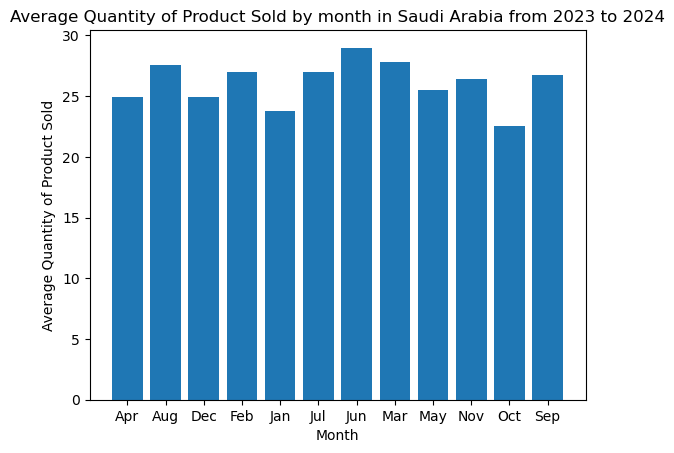

In [26]:
df_month_mean = df_combined[['month','Quantity']].groupby('month').mean().reset_index()
df_month_mean.head()
plt.bar(df_month_mean['month'],df_month_mean['Quantity'])
plt.xlabel('Month')
plt.ylabel('Average Quantity of Product Sold')
plt.title('Average Quantity of Product Sold by month in Saudi Arabia from 2023 to 2024')

Null hypothesis: expected quantity of each month is not differet from expected value of Quanity over year.
Alternative hypothesis: expected quantity of each month is differet from expected value of Quanity over year.

Significance level: 0.05

In [27]:
df_combined['month'] = df_combined['Date'].dt.month
from scipy.stats import ttest_1samp
q_mean = df_combined['Quantity'].mean()
print("The average value of Quantity : ", q_mean)
for i  in range(len(df_combined['month'].unique())+1):
    if i ==0:
        print()
    else:
        m = df_combined[df_combined['month'] == i]
        t_statitics, pval = ttest_1samp( m['Quantity'],q_mean)
        print("t_statistics of month {}".format(i), t_statitics,
          "\n P value of month {} : ".format(i), pval)
        print("")

The average value of Quantity :  26.08082191780822

t_statistics of month 1 -1.1609607374750097 
 P value of month 1 :  0.2501810118116579

t_statistics of month 2 0.504358591195905 
 P value of month 2 :  0.615988197284021

t_statistics of month 3 0.9055409606551041 
 P value of month 3 :  0.368741774957579

t_statistics of month 4 -0.6673483658000391 
 P value of month 4 :  0.5071515059120049

t_statistics of month 5 -0.3229309033146611 
 P value of month 5 :  0.7478519360413689

t_statistics of month 6 1.693154605061607 
 P value of month 6 :  0.0957003622508075

t_statistics of month 7 0.4437180812089893 
 P value of month 7 :  0.6588163899701915

t_statistics of month 8 0.9066707766955214 
 P value of month 8 :  0.3681486174937507

t_statistics of month 9 0.31722394903817847 
 P value of month 9 :  0.7521935547436993

t_statistics of month 10 -1.9782319906710595 
 P value of month 10 :  0.0524237519856854

t_statistics of month 11 0.17035780170193698 
 P value of month 11 :  0.865

Calculated t-statistics and pvalue of each month to check significance difference between expected quantity of month and expected quantity of year. Month 6 and 10 have the lower p value compare to other month, but they are insignificant with 5% significant level. Fail to reject the Null hypothesis: expected quantity of each month is not differet from expected value of Quanity over year and average quantity sold in a u

## Quantity by city

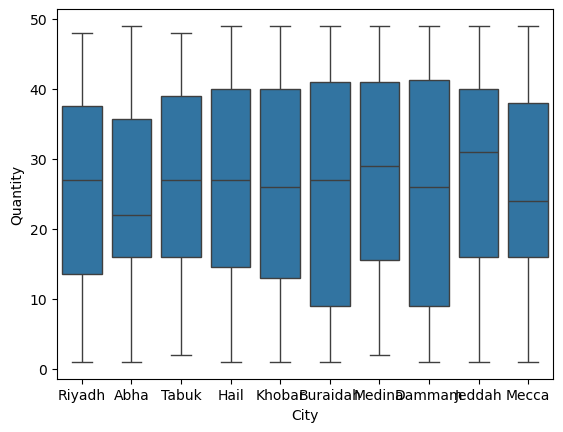

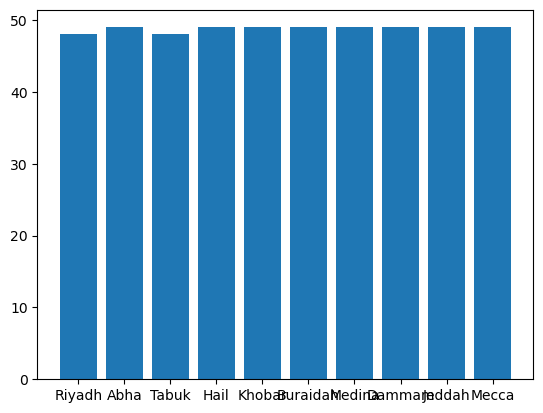

In [28]:
sns.boxplot(data = df_combined, x = 'City', y = 'Quantity')
plt.show()
plt.bar( df_combined['City'],  df_combined['Quantity'])
plt.show()

## Quantity by product and month


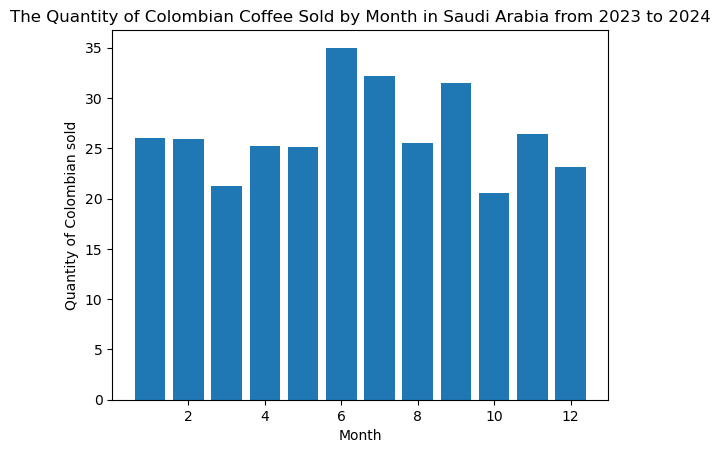

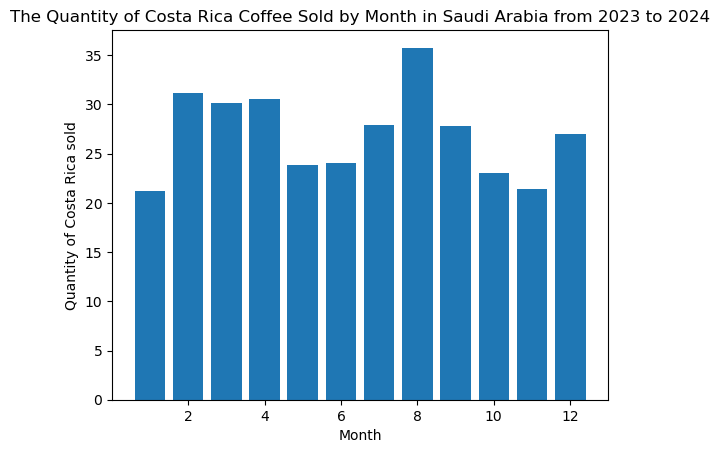

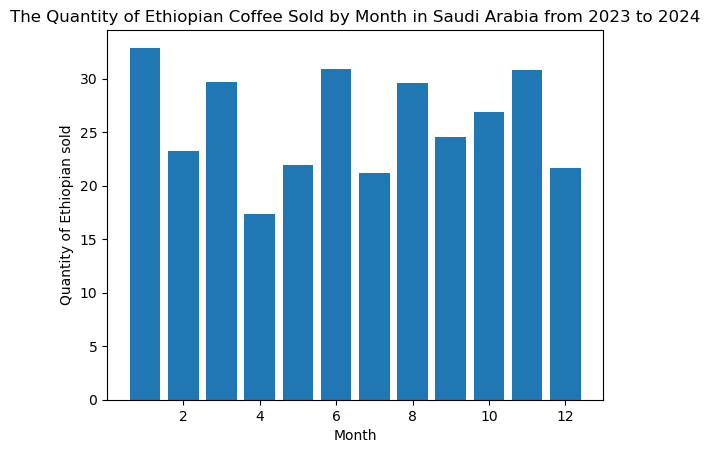

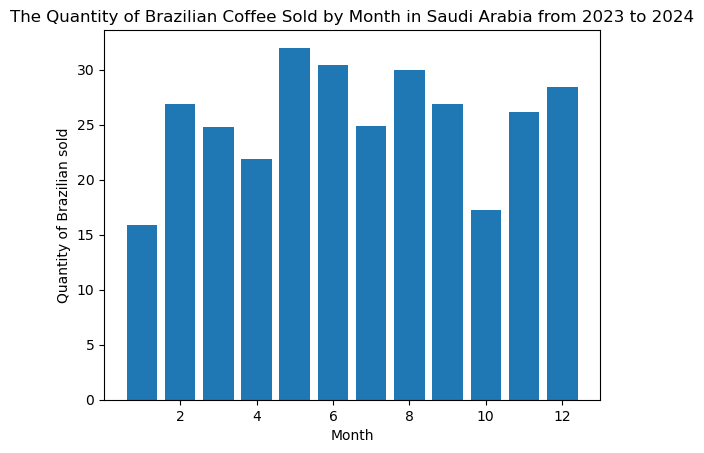

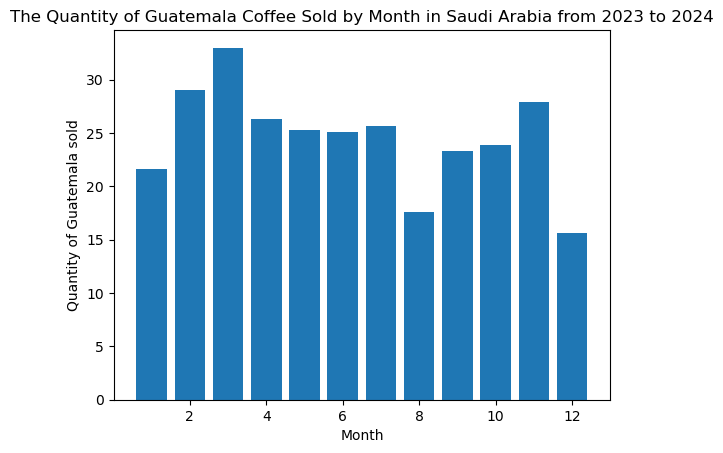

In [29]:
q_p_m = df_combined[['Quantity','Product','month']]
q_p_m.head()
q_p_m.groupby(['Product','month']).mean().reset_index()

df_month_product = df_combined[['Product','month','Quantity']].groupby(['Product','month']).mean().reset_index()

for i in range(len(products)):
    df_products = df_month_product[df_month_product['Product'] == products[i]]
    plt.bar(df_products['month'], df_products['Quantity'])
    plt.xlabel("Month")
    plt.ylabel('Quantity of {} sold'.format(products[i]))
    plt.title('The Quantity of {} Coffee Sold by Month in Saudi Arabia from 2023 to 2024'.format(products[i]))
    plt.show()

## Quanity by City and Product


In [30]:
df_qpc = df_combined[['Quantity','City','Product']]
df_qpc.head()
df_col = df_qpc[df_qpc['Product'] == products[0]]
df_col_sum = df_col[['Quantity','City']].groupby('City').sum().reset_index()
df_col_sum.rename(columns = {'Quantity' : 'Colombia_Quantity'}, inplace = True)
print(df_col_sum)

df_col = df_qpc[df_qpc['Product'] == products[1]]
df_1_sum = df_col[['Quantity','City']].groupby('City').sum().reset_index()
df_1_sum.rename(columns = {'Quantity' : '{}_Quantity'.format(str(products[1]))}, inplace = True)
print(df_1_sum)
df_col_sum = pd.concat([df_col_sum,df_1_sum['Costa Rica_Quantity']], axis = 1)

df_col = df_qpc[df_qpc['Product'] == products[2]]
df_1_sum = df_col[['Quantity','City']].groupby('City').sum().reset_index()
df_1_sum.rename(columns = {'Quantity' : '{}_Quantity'.format(str(products[2]))}, inplace = True)
df_col_sum = pd.concat([df_col_sum,df_1_sum['{}_Quantity'.format(str(products[2]))]], axis = 1)

df_col = df_qpc[df_qpc['Product'] == products[3]]
df_1_sum = df_col[['Quantity','City']].groupby('City').sum().reset_index()
df_1_sum.rename(columns = {'Quantity' : '{}_Quantity'.format(str(products[3]))}, inplace = True)
df_col_sum = pd.concat([df_col_sum,df_1_sum['{}_Quantity'.format(str(products[3]))]], axis = 1)

df_col = df_qpc[df_qpc['Product'] == products[4]]
df_1_sum = df_col[['Quantity','City']].groupby('City').sum().reset_index()
df_1_sum.rename(columns = {'Quantity' : '{}_Quantity'.format(str(products[4]))}, inplace = True)
df_col_sum = pd.concat([df_col_sum,df_1_sum['{}_Quantity'.format(str(products[4]))]], axis = 1)


df_col_sum

       City  Colombia_Quantity
0      Abha                286
1  Buraidah                291
2    Dammam                590
3      Hail                497
4    Jeddah                212
5    Khobar                465
6     Mecca                369
7    Medina                502
8    Riyadh                374
9     Tabuk                486
       City  Costa Rica_Quantity
0      Abha                  591
1  Buraidah                  304
2    Dammam                  456
3      Hail                  409
4    Jeddah                  520
5    Khobar                  293
6     Mecca                  326
7    Medina                  592
8    Riyadh                  632
9     Tabuk                  329


,City,Colombia_Quantity,Costa Rica_Quantity,Ethiopian_Quantity,Brazilian_Quantity,Guatemala_Quantity
0,Abha,286,591,220,312,202
1,Buraidah,291,304,401,516,277
2,Dammam,590,456,185,295,295
3,Hail,497,409,339,477,621
4,Jeddah,212,520,515,323,565
5,Khobar,465,293,327,386,364
6,Mecca,369,326,475,484,362
7,Medina,502,592,187,370,297
8,Riyadh,374,632,475,317,218
9,Tabuk,486,329,174,312,224


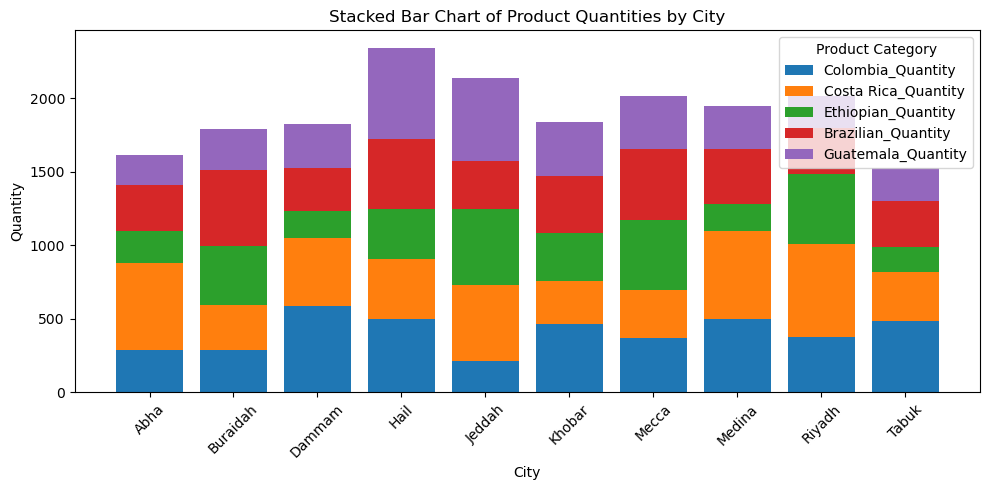

In [31]:
# Set up the figure and axis
plt.figure(figsize=(10, 5))

# Plot the stacked bar chart
cities = df_col_sum['City']
cities
categories = ["Colombia_Quantity", "Costa Rica_Quantity", "Ethiopian_Quantity", "Brazilian_Quantity", "Guatemala_Quantity"]

# Stacking the bars
bottom_values = [0] * len(cities)
for category in categories:
    plt.bar(cities, df_col_sum[category], label=category, bottom=bottom_values)
    bottom_values = [bottom_values[i] + df_col_sum[category][i] for i in range(len(bottom_values))]

# Customizing the chart
plt.title("Stacked Bar Chart of Product Quantities by City")
plt.xlabel("City")
plt.ylabel("Quantity")
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.tight_layout()

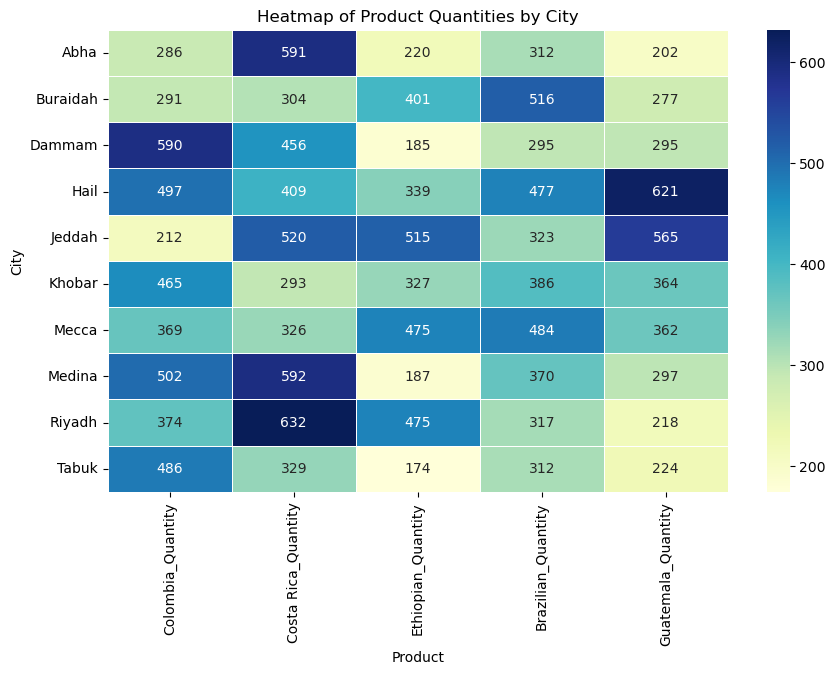

In [32]:

# Set 'City' as the index
df_col_sum.set_index("City", inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust the size of the plot
sns.heatmap(df_col_sum, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Product Quantities by City")
plt.xlabel("Product")
plt.ylabel("City")
plt.show()

In [33]:

df_col_sum = df_col_sum.T
for col in df_col_sum.columns.tolist() :
   print((df_col_sum.loc[df_col_sum[col] >= 500, col]))
   print("")


Costa Rica_Quantity    591
Name: Abha, dtype: int64

Brazilian_Quantity    516
Name: Buraidah, dtype: int64

Colombia_Quantity    590
Name: Dammam, dtype: int64

Guatemala_Quantity    621
Name: Hail, dtype: int64

Costa Rica_Quantity    520
Ethiopian_Quantity     515
Guatemala_Quantity     565
Name: Jeddah, dtype: int64

Series([], Name: Khobar, dtype: int64)

Series([], Name: Mecca, dtype: int64)

Colombia_Quantity      502
Costa Rica_Quantity    592
Name: Medina, dtype: int64

Costa Rica_Quantity    632
Name: Riyadh, dtype: int64

Series([], Name: Tabuk, dtype: int64)



Each city has popular products, so  manage invenory well.

## Quanity and discunts

               Quantity
Used_Discount          
False              9398
True               9641


<Axes: xlabel='Used_Discount', ylabel='Quantity'>

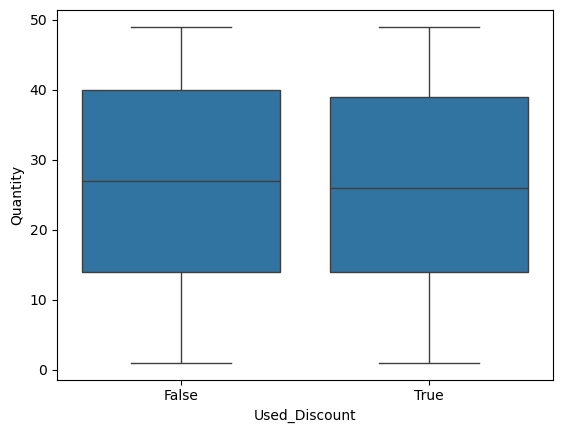

In [34]:
print(df[['Quantity','Used_Discount']].groupby('Used_Discount').sum())
sns.boxplot(x= df['Used_Discount'],y= df['Quantity'])

In [35]:
df[['Final Sales','Used_Discount']].groupby('Used_Discount').sum()
#sns.boxplot(x= df['Used_Discount'],y= df['Final Sales'])

,Final Sales
Used_Discount,
False,345260
True,284388


[[-0.00584148]]
[0.1419348]
0.49 0.4188034188034188 0.45662100456621


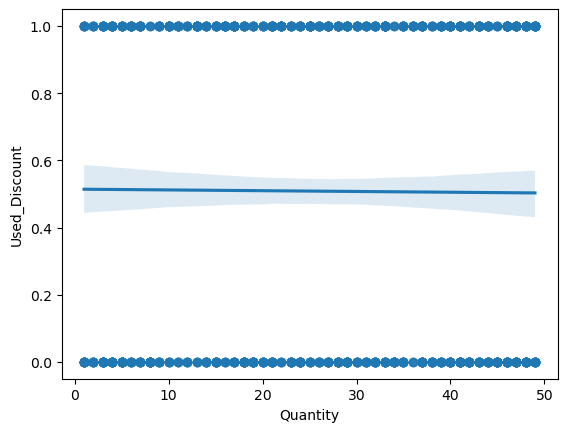

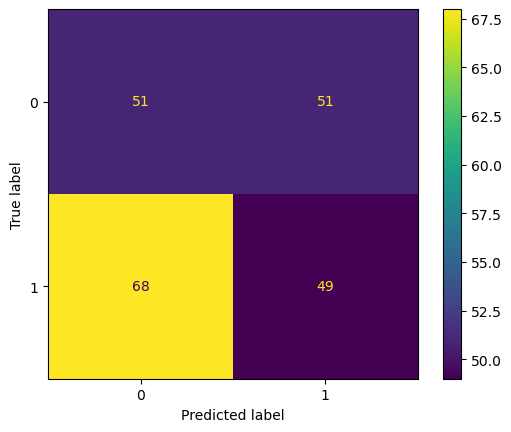

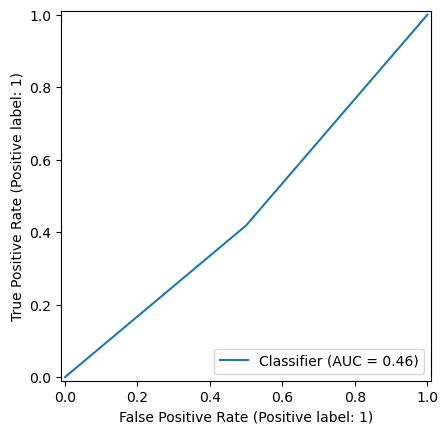

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
x = df[['Quantity']]
y = df['Used_Discount'].astype(int)


x_train,x_test, y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

clf = clf.fit(x_train,y_train)

print(clf.coef_)
print(clf.intercept_)

sns.regplot(x= x,y = y, logistic = True)

y_pred = clf.predict(x_test)

y_pred_pro = clf.predict_proba(x_test)[::,-1]

import sklearn.metrics as metrics

cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
accuracy = metrics.accuracy_score(y_test,y_pred)

print( precision, recall, accuracy)

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

Now i want to figure out why?
1. expary date is coming. so give discount price. -> check the which city have the high discount rate
2. big sum of purchase.


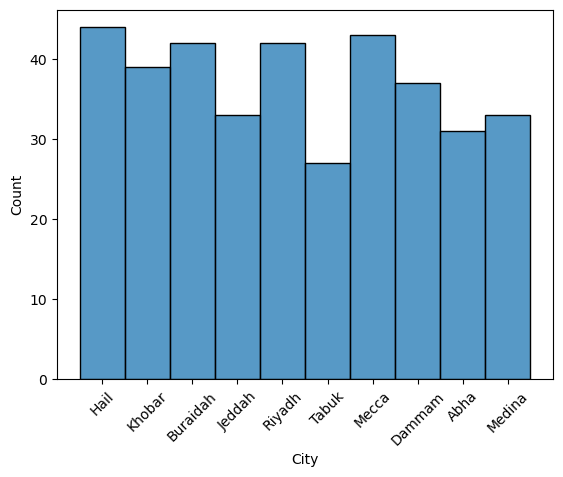

Cities with high discount number :  ['Buraidah', 'Hail', 'Khobar', 'Mecca', 'Riyadh']


In [37]:
df_dis = df_combined[['Used_Discount','City']]

df_dis = df_dis[df_dis['Used_Discount'] == True]
df_dis.head()

sns.histplot(df_dis['City'])
plt.xticks(rotation = 45)
plt.show()
city_fre = df_dis.value_counts().tolist()
city_mean = np.mean(city_fre)

df_grp = df_dis.groupby('City').sum().reset_index()
mask = df_grp['Used_Discount'] >= city_mean
df_grp= df_grp[mask]
df_grp = df_grp['City'].tolist()

print("Cities with high discount number : ", df_grp)
#for column in df_dis['City'].tolist():
#    if city_fre[df_dis['City'] == column] >= city_mean:
#        print("")
#        print(city_fre[city_fre['City'] == column].mean())

['Buraidah', 'Hail', 'Khobar', 'Mecca', 'Riyadh'] have high discount rate and It is possible the might have more products in stock.

2. big sum of purchase.
3. 

C:\Users\soonn\AppData\Local\Temp\ipykernel_17792\1719746665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grp['Quantity_grp'] = pd.cut(df_grp['Quantity'], bins = bins, labels = head, include_lowest = True)


<Axes: xlabel='Quantity_grp', ylabel='Count'>

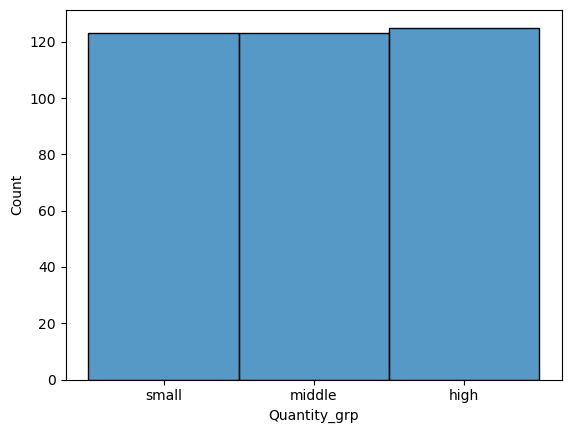

In [38]:
df_grp = df_combined[['Quantity','Used_Discount']]
bins = np.linspace(min(df_grp['Quantity']), max(df_grp['Quantity']), 4)
head = ['small','middle','high']
df_grp['Quantity_grp'] = pd.cut(df_grp['Quantity'], bins = bins, labels = head, include_lowest = True)

df_grp.head()
df_grp = df_grp[df_grp['Used_Discount'] == True]

sns.histplot(df_grp['Quantity_grp'])

Althohgh the quantity of sales at a time is small, the discount was applied, which means the discount is not applied by quantity of order.


In [52]:
# hypothersis
# Null hypothesis : sales of bean from Jun to Sep is higher than other month
# alternative hypothesis : sales of bean from Jun to Sep is the same or less than other month.
df['month'] = df['Date'].dt.month # assign month with integer
df['compare'] = df['month']
df.loc[df['compare'].isin([6,7,8,9]),'compare'] = 99
df.loc[df['compare'].isin([1,2,3,4,5,10,11,12]),'compare'] = 1
df['compare'] = df['compare'].astype(str)
df.loc[df['compare'] == '99','compare'] = 'high'
df.loc[df['compare'] == '1','compare'] = 'others'

df.head()

import pandas as pd
from scipy.stats import ttest_ind

# Split data by city
summer_q = df[df['compare'] == 'high']['Quantity']
other_q = df[df['compare'] == 'others']['Quantity']

# Perform independent t-test
t_stat, p_value = ttest_ind(summer_q, other_q)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("There is a significant difference in sales between summer months and other months.")
else:
    print("No significant difference in sales between summer months and other months.")



T-statistic: 1.955825526815722, P-value: 0.05086781138757017
No significant difference in sales between summer months and other months.
